# 导入工具包

In [1]:
# 数据读取及基本处理
import pandas as pd
import numpy as np

#查看数据分布是否对称/计算斜度/是否需要log或
from scipy.stats import skew

#可视化
import matplotlib.pyplot as plt
import seaborn as sns
# 显示文件图片
from IPython.display import display
# float显示三位小数 
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
from zhou_utils.utils_zhou import *
%matplotlib inline

In [2]:
# 设置一些全局的资源参数，可以进行个性化修改
import matplotlib

matplotlib.rc('figure', figsize = (10, 6))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

# 导入数据

In [3]:
data = pd.read_csv("./data/day.csv")
test = data[data.yr ==1] # 2012年做待预测数据
test = test.drop(["yr", "dteday"], axis=1)


data = data[data.yr ==0] # 2011年做数据分析
data = data.drop(["yr", "dteday"], axis=1)
data.head()

,instant,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,1,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,1,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,1,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,1,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600


In [10]:
# 特征名
data_nums = ["registered", "casual", "windspeed",
              "hum", "atemp", "temp",] 
data_objs = ["season", "mnth", "holiday", 
             "weekday", "workingday", "weathersit"] 

In [4]:
# 新特征组成的dict
new_features = {"temp_div_atemp": data.temp.values/data.atemp.values,
               "hum_mul_windspeed":data.hum.values*data.windspeed.values,
               "temp_mul_temp":data.temp.values**2,
               "temp_squ":data.temp.values**0.5,
               "atemp_mul_atemp":data.atemp.values**2,
                "atemp_squ":data.atemp.values**0.5,
               "weathersit_div_temp":data.weathersit.values/data.temp.values}
#new_features.join(data.temp.values/data.atemp.values)
new_features_test =  {"temp_div_atemp": test.temp.values/test.atemp.values
                      , "hum_mul_windspeed":test.hum.values*test.windspeed.values
                      , "temp_mul_temp":test.temp.values**2
                      , "temp_squ":test.temp.values**0.5
                      , "atemp_mul_atemp":test.atemp.values**2
                      , "atemp_squ":test.atemp.values**0.5
                      , "weathersit_div_temp":test.weathersit.values/test.temp.values}

# 添加新特征到data, 一定要注意索引,
new_features = pd.DataFrame(new_features, index=data.index)
new_features_test = pd.DataFrame(new_features_test, index=test.index)


In [5]:
# 添加新特征到data, 一定要注意索引,
# new_features索引是range(new_features[0])
# 如果data删除一些值,索引就会不连续添加时便会出现nan

data = data.join(new_features)

# 添加之前重新定义索引
# test = test.reset_index(drop = True)
# test的索引是range(data.shape[0], data.shape[0]+test.shape[0])
test = test.join(new_features_test)

In [6]:
show_number_describe(data)

共有：[365]条样本，特征数为：[21]，其中有[21]个特征是number
使用内存大小为: [72.73] KB


,count,mean,std,min,25%,50%,75%,max,dif_vals,dtype,num_null
instant,365,183.000,105.511,1.000,92.000,183.000,274.000,365.000,365,int64,0
season,365,2.499,1.111,1.000,2.000,3.000,3.000,4.000,4,int64,0
mnth,365,6.526,3.453,1.000,4.000,7.000,10.000,12.000,12,int64,0
holiday,365,0.027,0.163,0.000,0.000,0.000,0.000,1.000,2,int64,0
weekday,365,3.008,2.006,0.000,1.000,3.000,5.000,6.000,7,int64,0
workingday,365,0.685,0.465,0.000,0.000,1.000,1.000,1.000,2,int64,0
weathersit,365,1.422,0.572,1.000,1.000,1.000,2.000,3.000,3,int64,0
temp,365,0.487,0.190,0.059,0.325,0.479,0.657,0.849,294,float64,0
atemp,365,0.467,0.169,0.079,0.322,0.473,0.612,0.841,353,float64,0
hum,365,0.644,0.149,0.000,0.538,0.647,0.742,0.973,332,float64,0


In [7]:
show_number_describe(test)

共有：[366]条样本，特征数为：[21]，其中有[21]个特征是number
使用内存大小为: [72.91] KB


,count,mean,std,min,25%,50%,75%,max,dif_vals,dtype,num_null
instant,366,548.500,105.799,366.000,457.250,548.500,639.750,731.000,366,int64,0
season,366,2.495,1.112,1.000,2.000,2.500,3.000,4.000,4,int64,0
mnth,366,6.514,3.456,1.000,4.000,7.000,9.750,12.000,12,int64,0
holiday,366,0.030,0.171,0.000,0.000,0.000,0.000,1.000,2,int64,0
weekday,366,2.986,2.006,0.000,1.000,3.000,5.000,6.000,7,int64,0
workingday,366,0.683,0.466,0.000,0.000,1.000,1.000,1.000,2,int64,0
weathersit,366,1.369,0.516,1.000,1.000,1.000,2.000,3.000,3,int64,0
temp,366,0.504,0.176,0.107,0.348,0.514,0.654,0.862,293,float64,0
atemp,366,0.482,0.157,0.102,0.351,0.498,0.608,0.805,357,float64,0
hum,366,0.612,0.134,0.254,0.508,0.612,0.711,0.925,319,float64,0


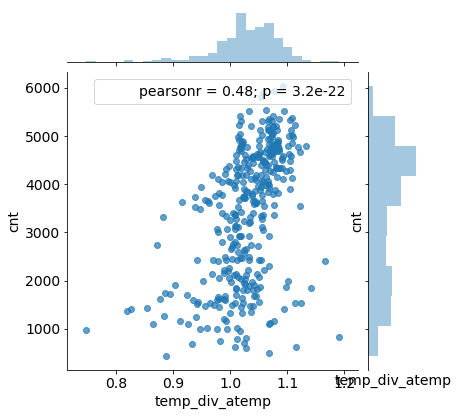

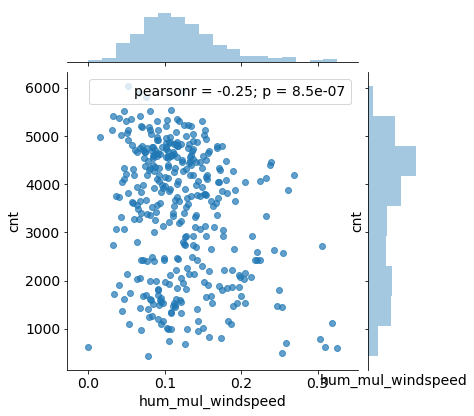

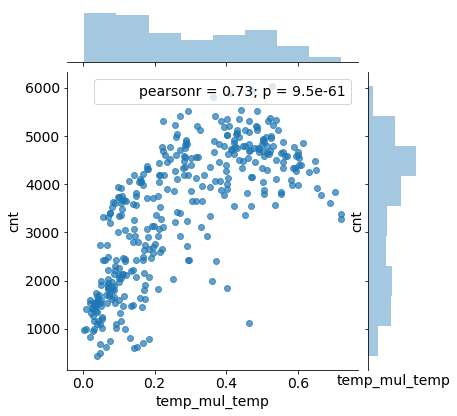

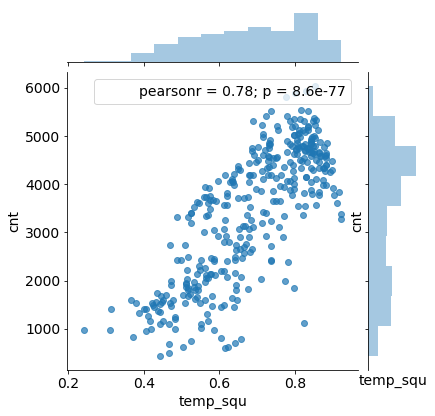

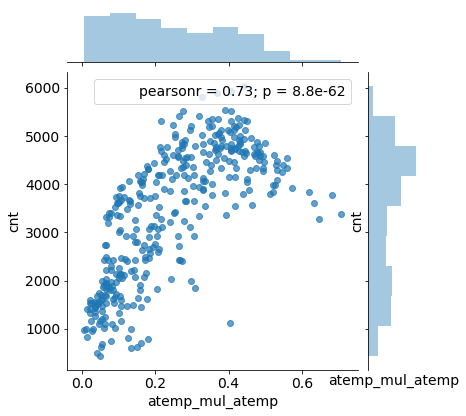

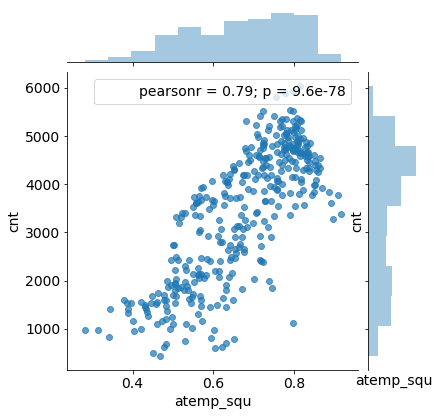

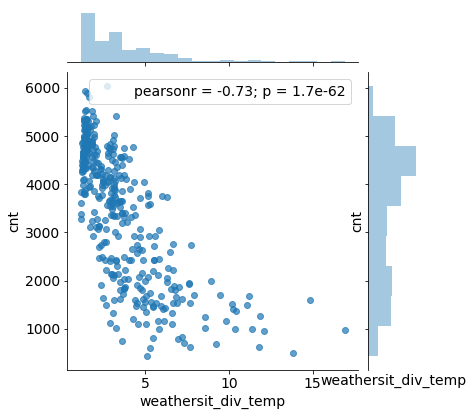

In [8]:
# 查看new_features与target的相关性
for col in new_features:
    sns.jointplot(x=col, y="cnt", data=data, alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("cnt")
    plt.show()

删除outliner
temp_div_atemp<1.5

查看离散型数据与target的箱型图(matplot)
descrete = ["season", "mnth", "holiday", "weekday", 
            "workingday", "weathersit"]
for col in descrete:
    x = set(data[col]) # labels, 用set()去重
    y = [] #labeks对应数据集
    for v in x:
        y.append(list(target[data[col]==v]))
    plt.boxplot(y, labels=x)
    plt.xlabel(col)
    plt.ylabel("cnt")
    plt.show()


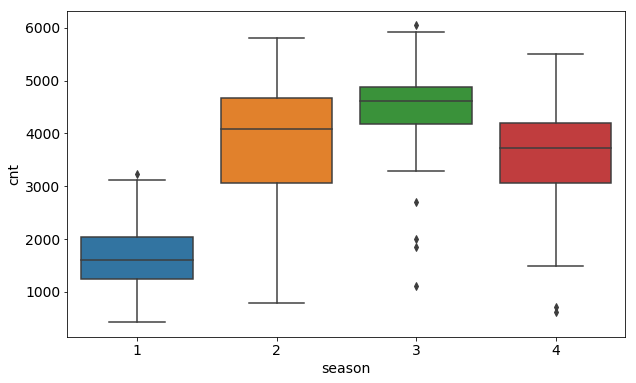

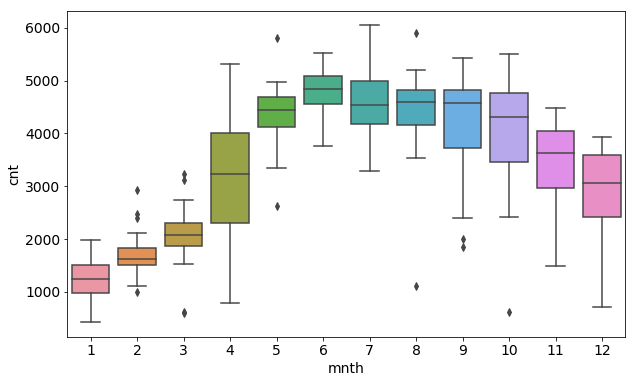

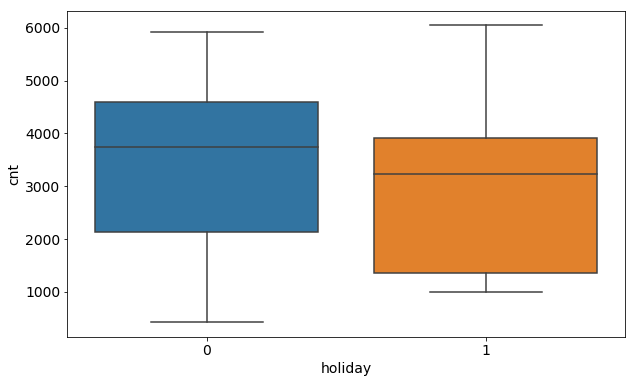

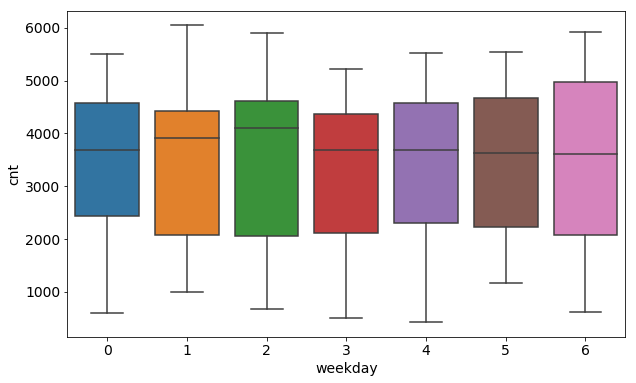

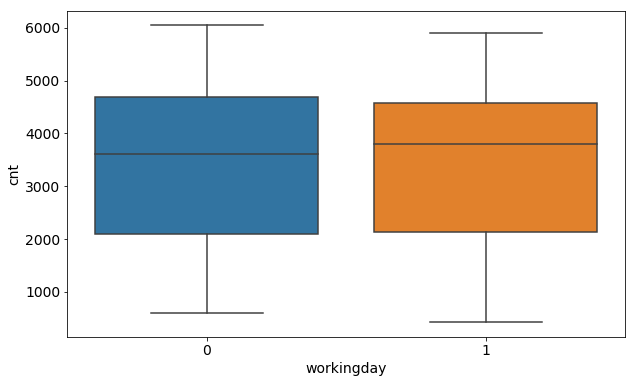

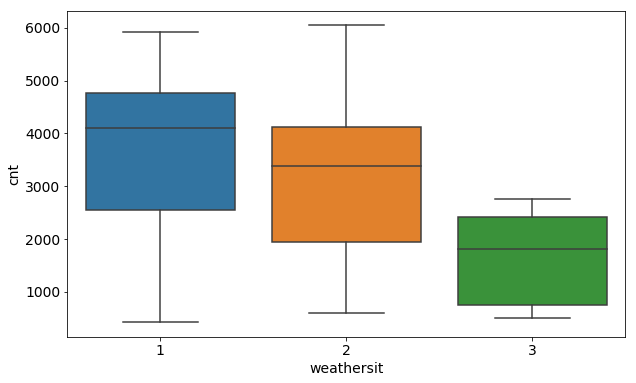

In [11]:
for col in data_objs:
    sns.boxplot(x=col, y="cnt", data=data)
    plt.xlabel(col)
    plt.ylabel("cnt")
    plt.show()

离群点
(data.season==1) & (data.cnt>7000)
(data.season==4) & (data.cnt<100)
(data.yr==1) & (data.cnt<100)
data[(data.yr==1)].cnt.sort_values() 
具体查看cnt的值,图上看不清楚

## 离群点

In [12]:
# 离群点对应的instant
outliner =      list(data[(data.season==3) & (data.cnt<3000)].instant)
outliner.extend(list(data[(data.season==4) & (data.cnt<1000)].instant))
outliner.extend(list(data[data.temp_div_atemp>1.5].instant))

outliner = set(outliner) #去除重复
print("原始数据",data.shape)
for v in outliner:
    data = data[data.instant!=v]
print("删除之后",data.shape)


原始数据 (365, 21)
删除之后 (359, 21)


## onehot

In [13]:
data = pd.get_dummies(data, columns=["season", "mnth", "holiday"
                              , "weekday", "workingday", "weathersit"])
test = pd.get_dummies(test, columns=["season", "mnth", "holiday"
                              , "weekday", "workingday", "weathersit"])
data.head()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt,temp_div_atemp,hum_mul_windspeed,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,0.344,0.364,0.806,0.160,331,654,985,0.946,0.129,...,0,0,0,0,1,1,0,0,1,0
1,2,0.363,0.354,0.696,0.249,131,670,801,1.028,0.173,...,0,0,0,0,0,1,0,0,1,0
2,3,0.196,0.189,0.437,0.248,120,1229,1349,1.037,0.109,...,0,0,0,0,0,0,1,1,0,0
3,4,0.200,0.212,0.590,0.160,108,1454,1562,0.943,0.095,...,1,0,0,0,0,0,1,1,0,0
4,5,0.227,0.229,0.437,0.187,82,1518,1600,0.990,0.082,...,0,1,0,0,0,0,1,1,0,0


In [14]:
# 保存特征工程后的数据
data.to_csv("./data/train_FE.csv"
            , index=False)
test.to_csv("./data/test_FE.csv"
            , index=False)
# 保存test数据